In [1]:
# Standard scientific Python imports
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import re
from io import StringIO
import seaborn as sns

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold

#ROC Curve
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification

# scikit-learn k-fold cross-validation
from numpy import array

In [2]:
input_data = pd.read_csv("/Users/SailahariMullapudi/Desktop/PanPred-master/test_data/curated_input_GY.csv")
input_data2 = input_data.rename(columns={"Unnamed: 0": "Isolate"})
output_data = pd.read_csv("/Users/SailahariMullapudi/Desktop/PanPred-master/test_data/Metadata.csv")
output_data = output_data.replace(to_replace=['S', 'R'], value=[0, 1])
input_all = input_data2.merge(output_data, on='Isolate', how='left')
del input_all['AMP']
del input_all['CET']
del input_all['TBM']
del input_all['TMP']

input_all.head()

,Isolate,AMX_x,Year_x,yeiU,yhhS,ybaE,eutR,ibrB,ytfP,aslB,...,group_49257,Year_y,CTZ,CTX,AMX_y,AMC,TZP,CXM,GEN,CIP
0,11657_5#10,NaN,2010.0,1,1,1,1,1,1,1,...,0,2010.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1,11657_5#11,NaN,2010.0,1,1,1,1,1,1,1,...,0,2010.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0
2,11657_5#12,NaN,2010.0,1,1,1,1,1,1,1,...,0,2010.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0
3,11657_5#13,NaN,2010.0,1,1,1,1,1,1,1,...,0,2010.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0
4,11657_5#14,NaN,2010.0,1,1,1,1,1,1,1,...,0,2010.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


# TZP

In [3]:
input_allna3 = input_all.dropna()
TZP = input_allna3['TZP']

del input_allna3['CTX']
del input_allna3['AMC']
del input_allna3['TZP']
del input_allna3['CXM']
del input_allna3['GEN']
del input_allna3['CIP']
del input_allna3['AMX_x']
del input_allna3['AMX_y']
del input_allna3['Isolate']
del input_allna3['CTZ']
del input_allna3['Year_x']
del input_allna3['Year_y']
x = np.array(input_allna3)
print(x)

X = x
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
[ 204  205  206  207  208  209  210  211  212  213  214  215  216  217
  218  219  220  221  222  223  224  225  226  227  228  229  230  231
  232  233  234  235  236  237  238  239  240  241  242  243  244  245
  246  247  248  249  250  251  252  253  254  255  256  257  258  259
  260  261  262  263  264  265  266  267  268  269  270  271  272  273
  274  275  276  277  278  279  280  281  282  283  284  285  286  287
  288  289  290  291  292  293  294  295  296  297  298  299  300  301
  302  303  304  305  306  307  308  309  310  311  312  313  314  315
  316  317  318  319  320  321  322  323  324  325  326  327  328  329
  330  331  332  333  334  335  336  337  338  339  340  341  342  343
  344  345  346  347  348  349  350  351  352  353  354  355  356  357
  358  359  360  361  362  363  364  365  366  367  368  369  370  371
  372  373  374  375  376  3

/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       192
         1.0       0.00      0.00      0.00        12

    accuracy                           0.93       204
   macro avg       0.47      0.49      0.48       204
weighted avg       0.88      0.93      0.91       204


Confusion matrix:
[[189   3]
 [ 12   0]]


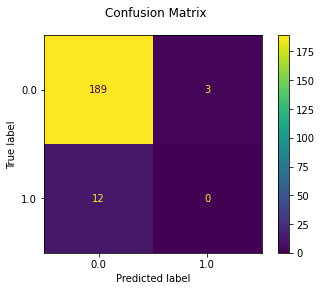

In [4]:
logreg= LogisticRegression(penalty='l2',solver='lbfgs')
X_train, X_test, TZP_train, TZP_test = train_test_split(X, TZP, test_size=0.2, random_state=42)
logreg.fit(X_train,TZP_train)
predictedTZP_LR=logreg.predict(X_test)

print(
    f"Classification report for classifier {logreg}:\n"
    f"{metrics.classification_report(TZP_test, predictedTZP_LR)}\n"
)

TZP_cmLR = metrics.ConfusionMatrixDisplay.from_predictions(TZP_test, predictedTZP_LR)
TZP_cmLR.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{TZP_cmLR.confusion_matrix}")

plt.show()

Classification report for classifier RandomForestClassifier(max_features='sqrt', n_jobs=-1, oob_score=True):
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       199
         1.0       0.00      0.00      0.00         5

    accuracy                           0.98       204
   macro avg       0.49      0.50      0.49       204
weighted avg       0.95      0.98      0.96       204


Confusion matrix:
[[199   0]
 [  5   0]]


/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

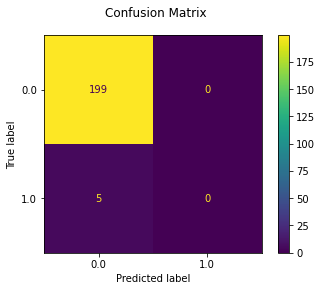

In [5]:
rfreg = RandomForestClassifier(n_jobs=-1,max_features= "sqrt" ,n_estimators= 100, oob_score = True) 
X_train, X_test, TZP_train, TZP_test = train_test_split(X, TZP, test_size = 0.2, random_state=55)
rfreg.fit(X_train,TZP_train)
predictedTZP_RF = rfreg.predict(X_test)

print(
    f"Classification report for classifier {rfreg}:\n"
    f"{metrics.classification_report(TZP_test, predictedTZP_RF)}\n"
)

TZP_cmRF = metrics.ConfusionMatrixDisplay.from_predictions(TZP_test, predictedTZP_RF)
TZP_cmRF.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{TZP_cmRF.confusion_matrix}")

plt.show()

Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       199
         1.0       0.00      0.00      0.00         5

    accuracy                           0.97       204
   macro avg       0.49      0.49      0.49       204
weighted avg       0.95      0.97      0.96       204


Confusion matrix:
[[197   2]
 [  5   0]]


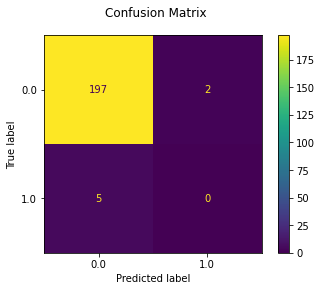

In [6]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
X_train, X_test, TZP_train, TZP_test = train_test_split(X, TZP, test_size = 0.2, random_state=55)
gbc.fit(X_train,TZP_train)
predictedTZP_GBDT = gbc.predict(X_test)

print(
    f"Classification report for classifier {gbc}:\n"
    f"{metrics.classification_report(TZP_test, predictedTZP_GBDT)}\n"
)

TZP_cmGBDT = metrics.ConfusionMatrixDisplay.from_predictions(TZP_test, predictedTZP_GBDT)
TZP_cmGBDT.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{TZP_cmGBDT.confusion_matrix}")

plt.show()

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       194
         1.0       0.00      0.00      0.00        10

    accuracy                           0.95       204
   macro avg       0.48      0.50      0.49       204
weighted avg       0.90      0.95      0.93       204


Confusion matrix:
[[194   0]
 [ 10   0]]


/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

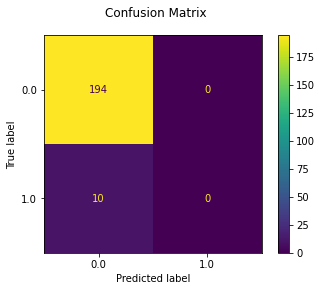

In [7]:
clf = svm.SVC(gamma=0.001)
X_train, X_test, TZP_train, TZP_test = train_test_split(
    X, TZP, test_size=0.2, shuffle=True
)
clf.fit(X_train, TZP_train)
predictedTZP_SVM = clf.predict(X_test)

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(TZP_test, predictedTZP_SVM)}\n"
)

TZP_cmSVM = metrics.ConfusionMatrixDisplay.from_predictions(TZP_test, predictedTZP_SVM)
TZP_cmSVM.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{TZP_cmSVM.confusion_matrix}")

plt.show()

In [8]:
# clf_disp = plot_roc_curve(clf, X_test, TZP_test)
# plt.show()

In [9]:
# rfreg_disp = plot_roc_curve(rfreg, X_test, TZP_test)
# plt.show()

In [10]:
# logreg_disp = plot_roc_curve(logreg, X_test, TZP_test)
# plt.show()

In [11]:
# gbdt_disp = plot_roc_curve(gbc, X_test, TZP_test)
# plt.show()

/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/SailahariMullapudi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is depreca

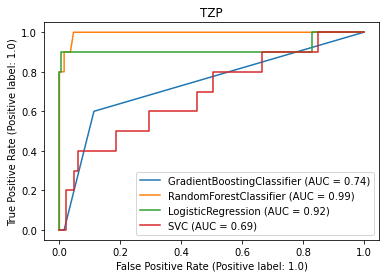

In [12]:
gbdt_disp = plot_roc_curve(gbc, X_test, TZP_test)
rfreg_disp = plot_roc_curve(rfreg, X_test, TZP_test,ax=gbdt_disp.ax_)
logreg_disp = plot_roc_curve(logreg, X_test, TZP_test, ax=gbdt_disp.ax_ )
clf_disp = plot_roc_curve(clf, X_test, TZP_test, ax=gbdt_disp.ax_ )
plt.title("TZP")
plt.show()